## DEPENDENCIES

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings(action='ignore')

print("All Modules Imported Successfully")

All Modules Imported Successfully


## READ DATASET

In [35]:
data = pd.read_excel("../data/RoadAccident.xlsx")
roadAccident_df = pd.DataFrame(data)

In [81]:
roadAccident_df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Unnamed: 21
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,0.605991
1,201043P017110,2022-11-03,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.604747,Daylight,South Oxfordshire,NaN,...,1,Thames Valley,Dry,Single carriageway,30,15:05:00,Urban,Fine no high winds,Motorcycle over 500cc,0.301391
2,200906X025480,2021-12-12,Saturday,Not at junction or within 20 metres,Not at junction or within 20 metres,Slight,53.538897,Darkness - lighting unknown,Bolton,NaN,...,2,Greater Manchester,Dry,Dual carriageway,70,19:55:00,Urban,Fine no high winds,Car,0.393739
3,200914K091309,2021-03-25,Wednesday,Give way or uncontrolled,T or staggered junction,Slight,53.340741,Darkness - lights lit,Sheffield,NaN,...,1,South Yorkshire,Wet or damp,Single carriageway,30,19:30:00,Urban,Fine no high winds,Motorcycle over 500cc,0.822978
4,200904BC09246,2021-10-02,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.843224,Daylight,Wyre,NaN,...,1,Lancashire,Dry,Single carriageway,30,15:03:00,Urban,Fine no high winds,Car,0.172277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,2010000000000,2021-09-23,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.520145,Daylight,Bridgend,NaN,...,2,South Wales,Dry,Single carriageway,30,10:25:00,Urban,Fine no high winds,Car,0.180605
307969,2010160C08061,2022-12-26,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.910138,Darkness - lights lit,East Riding of Yorkshire,Other object on road,...,1,Humberside,Frost or ice,Single carriageway,30,18:49:00,Rural,Fine no high winds,Car,0.384615
307970,201037G029971,2022-09-03,Friday,Give way or uncontrolled,T or staggered junction,Slight,52.067061,Daylight,Ipswich,NaN,...,2,Suffolk,Dry,Single carriageway,30,15:40:00,Urban,Fine no high winds,Car,0.941650
307971,2010000000000,2021-06-06,Saturday,Data missing or out of range,Not at junction or within 20 metres,Serious,52.205983,Darkness - lights lit,Cambridge,NaN,...,1,Cambridgeshire,Dry,Dual carriageway,30,21:06:00,Urban,Fine no high winds,Car,0.156479


## BUSINESS CASE AND POINTS TO ANALYSE

***Primary KPI :***

1. Analysis of total casualties and their percentage distribution based on
accident severity.
2. Examination of casualties categorized by vehicle type.
3. Identification of monthly casualty trends throughout the years 2021-2022.
4. Assessment of casualties relative to road types.
5. Investigation into casualties in correlation with the number of vehicles
involved in accidents.
6. Exploration of the relationship between casualties and geographical
factors such as urban and rural areas.
7. Analysis of casualties concerning temporal factors such as day and night
occurrences.
8. Examination of casualties in relation to road surface conditions.
9. Evaluation of casualties during weekdays versus weekends, segmented
by urban and rural settings.

***Secondary KPI :***

1. Analysis of casualties segmented by time intervals (3 hours) and day of
the week.
2. Examination of casualties at junction-controlled areas in rural and urban
settings, specifically for incidents involving high-speed vehicles.
3. Comparative study of casualties between rural and urban areas, focusing
on fatal accidents during high-speed incidents and considering the lighting
conditions of the road at night.
4. Investigation into casualties based on weather conditions and speed
variables, aiming to discern correlations and patterns.
(NOTE : Merge similar types of data for better analysis (e.g., In Vehicle type
Motorcycles over 125cc and up to 500cc, Motorcycles over 500cc, and Motorcycles
50cc and under can be categorized under a single category: motorcycles).

## TASK

**Data Cleaning** : Data cleansing is a crucial step in refining raw datasets into
organised and pertinent entries. Within the provided dataset, the following
unrefined entities needs to be identified:
1. Duplicate entries: Instances where identical records appear more than
once, which can introduce redundancy and inaccuracies in analysis.
2. Blank entries: Records lacking essential information, which can impede
comprehensive data analysis and interpretation.
3. Spelling mistakes in some data: Incorrect spellings in the data can cause
confusion and mistakes in understanding, which can then lead to errors in
later analyses.

**Data Processing :**
1. Grouped similar row categories to get a more general data trend
2. Add a new feature &quot;month&quot; by extracting month from the date column to
get a better idea of monthly trend of accident casualties
3. Add a new feature &quot;year&quot; by extracting year from the date column to get a

## VARIABLE DESCRIPTION

1. **Accident_Index**: Unique identifier for each accident.
2. **Accident Date**: The date on which the accident occurred.
3. **Day_of_Week**: Day of the week when the accident occurred.
4. **Junction_Control**: Type of control at the junction where the accident took place (e.g., traffic lights, stop sign).
5. **Junction_Detail**: Specific details about the junction (e.g., crossroads, roundabout).
6. **Accident_Severity**: Severity of the accident (e.g., fatal, serious, or slight injury).
7. **Latitude**: Latitude coordinate of the accident location.
8. **Light_Conditions**: Lighting conditions at the time of the accident (e.g., daylight, darkness).
9. **Local_Authority_(District)**: Code for the local authority district where the accident occurred.
10. **Carriageway_Hazards**: Hazards present on the carriageway (e.g., oil spill, debris).
11. **Longitude**: Longitude coordinate of the accident location.
12. **Number_of_Casualties**: Total number of casualties in the accident.
13. **Number_of_Vehicles**: Total number of vehicles involved in the accident.
14. **Police_Force**: Police force responsible for reporting the accident.
15. **Road_Surface_Conditions**: Condition of the road surface (e.g., dry, wet).
16. **Road_Type**: Type of road where the accident occurred (e.g., motorway, dual carriageway).
17. **Speed_limit**: Speed limit on the road where the accident occurred.
18. **Time**: Time of the day when the accident occurred.
19. **Urban_or_Rural_Area**: Whether the accident occurred in an urban or rural area.
20. **Weather_Conditions**: Weather conditions at the time of the accident (e.g., rain, clear).
21. **Vehicle_Type**: Type of vehicle(s) involved in the accident.

## DATA UNDERSTANDING

* The dataset provided is about road accident casualties in UK in the year 2021 and 2022. The set consists of accidents reported to respect police authorities which contains various important factors such as speed, weather condition for every accident reported.

## OVERVIEW OF THE DATASET

In [97]:
roadAccident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Carriageway_Hazards         5424 non-null    object        
 10  Longitude                   307973 non-null  float64       
 11  Number_of_Casualties        307973 non-

## CHECKING MISSING VALUES

In [100]:
roadAccident_df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
Unnamed: 21                        0
dtype: int64

## MISSING VALUE TREATMENT

* As the Variables are Categorical, we are simply dropping the rows of where the columns: Road_Surface_Conditions, Road_Type, Weather_Conditions have missing values

In [116]:
# Drop rows where any of the specified columns have missing values
roadAccident_df = roadAccident_df.dropna(subset=['Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions'])

## REPLACING SPELLING MISTAKE

In [129]:
# Replace "Slide" with "Slight" in the Accident_Severity column
roadAccident_df['Accident_Severity'] = roadAccident_df['Accident_Severity'].replace('Slide', 'Slight')

In [135]:
# Replace "Slide" with "Slight" in the Accident_Severity column
roadAccident_df['Accident_Severity'] = roadAccident_df['Accident_Severity'].replace('Fetal', 'Fatal')

In [206]:
# Display the updated unique values in the Vehicle_Type column
print(roadAccident_df['Accident_Severity'].unique())

['Serious' 'Slight' 'Fatal' ' ']


***INSIGHTS:***

* According to manual Inspection of the Dataset, It is found that the column 'Accident_Severity' has spelling mistake
* 'Slide' should be replaced with 'Slight'
* 'Fetal' should be replaced with 'Fatal'
* The Column has 3 unique values - Serious, Slight, Fatal

## GROUPING SIMILAR DATA INTO GROUPS

In [201]:
# Replace any value containing "Motorcycle" (case-insensitive) with "Motorcycle"
roadAccident_df['Vehicle_Type'] = roadAccident_df['Vehicle_Type'].str.replace(
    r'.*Motorcycle.*', 'Motorcycle', 
    case=False, 
    regex=True
)

In [228]:
# Replace 'Goods' and 'Agricultural' with 'Goods Vehicle'
roadAccident_df['Vehicle_Type'] = roadAccident_df['Vehicle_Type'].replace(
    to_replace=r'.*(Goods|Agricultural).*', 
    value='Goods Vehicle', 
    regex=True
)

In [232]:
# Replace any value containing "bus" (case-insensitive) with "Bus"
roadAccident_df['Vehicle_Type'] = roadAccident_df['Vehicle_Type'].str.replace(
    r'.*bus.*', 
    'Bus', 
    case=False, 
    regex=True
)

In [234]:
# Display the updated unique values in the Vehicle_Type column
print(roadAccident_df['Vehicle_Type'].unique())

['Car' 'Motorcycle' 'Goods Vehicle' 'Bus' 'Taxi/Private hire car'
 'Other vehicle' 'Pedal cycle' 'Ridden horse']


## UNIVARIATE ANALYSIS

In [293]:
numerical_cols = ['Day_of_Week', 'Junction_Control', 'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Weather_Conditions', 'Vehicle_Type']

categorical_cols = ['Urban_or_Rural_Area', 'Road_Type', 'Number_of_Casualties', 'Number_of_Vehicles']

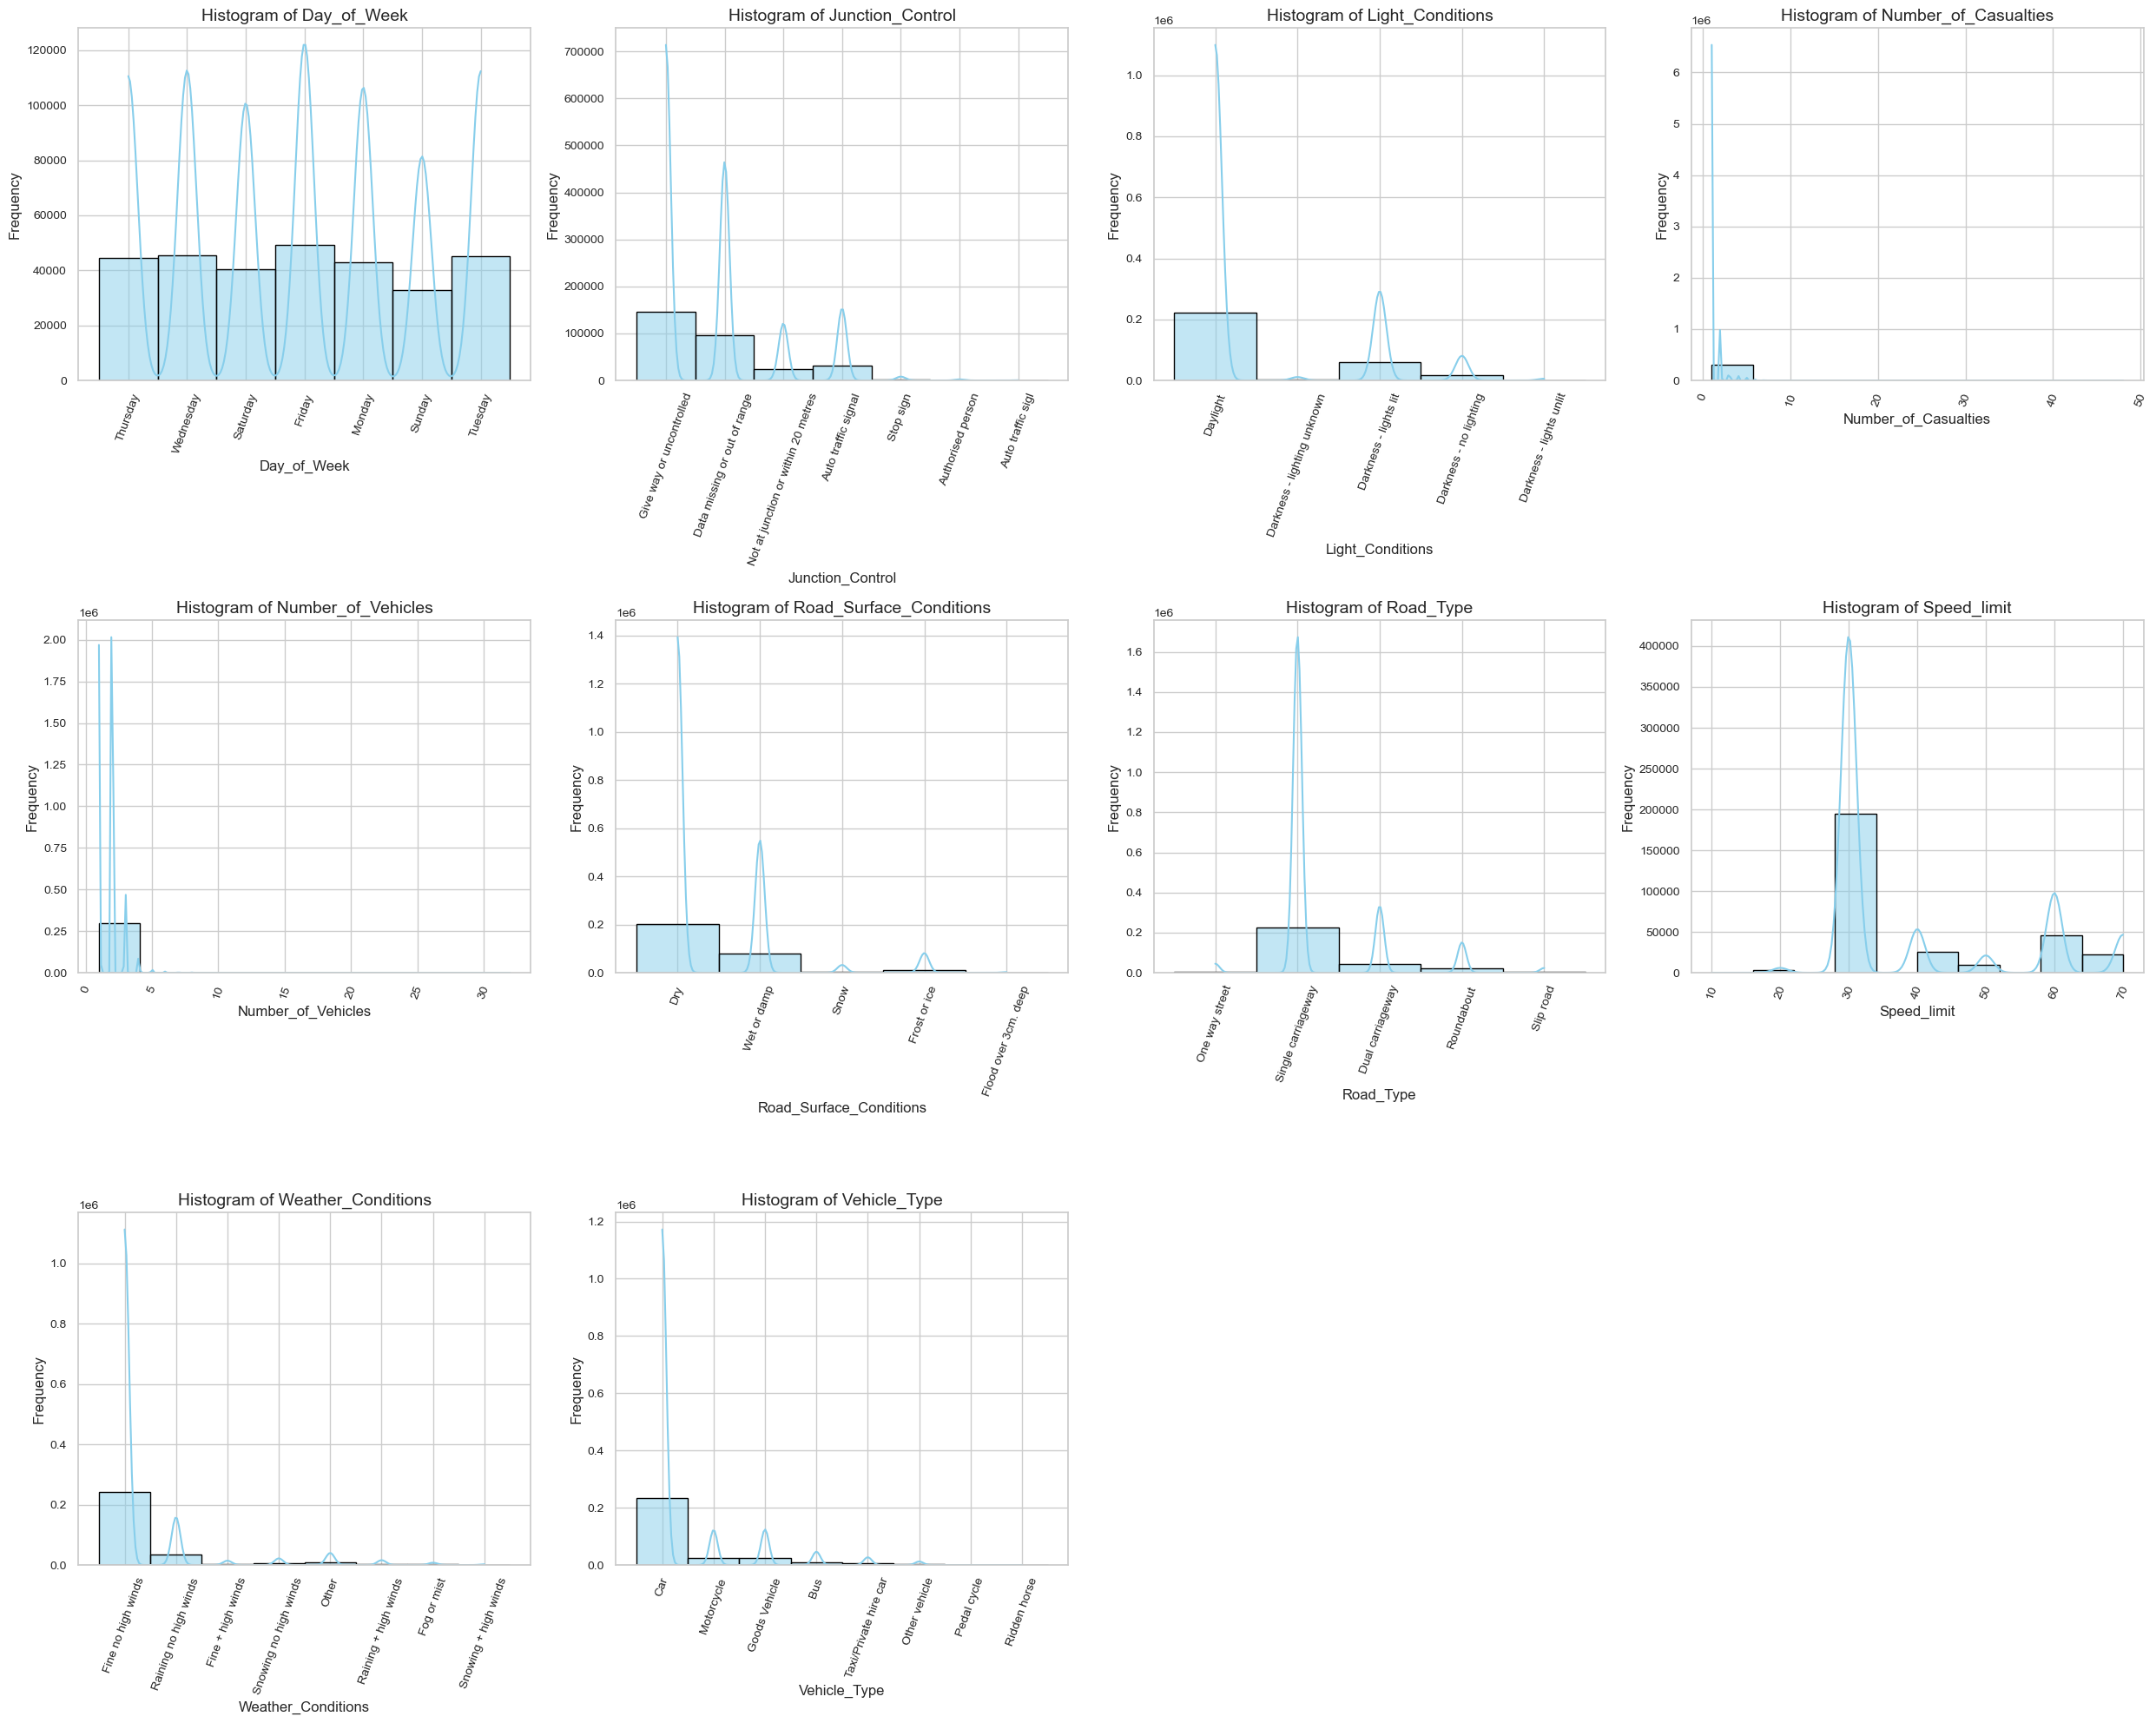

In [285]:
sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

plt.figure(figsize=(25, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(roadAccident_df[col], kde = True, color='skyblue', edgecolor='black', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=70)
    
plt.tight_layout()
plt.show()



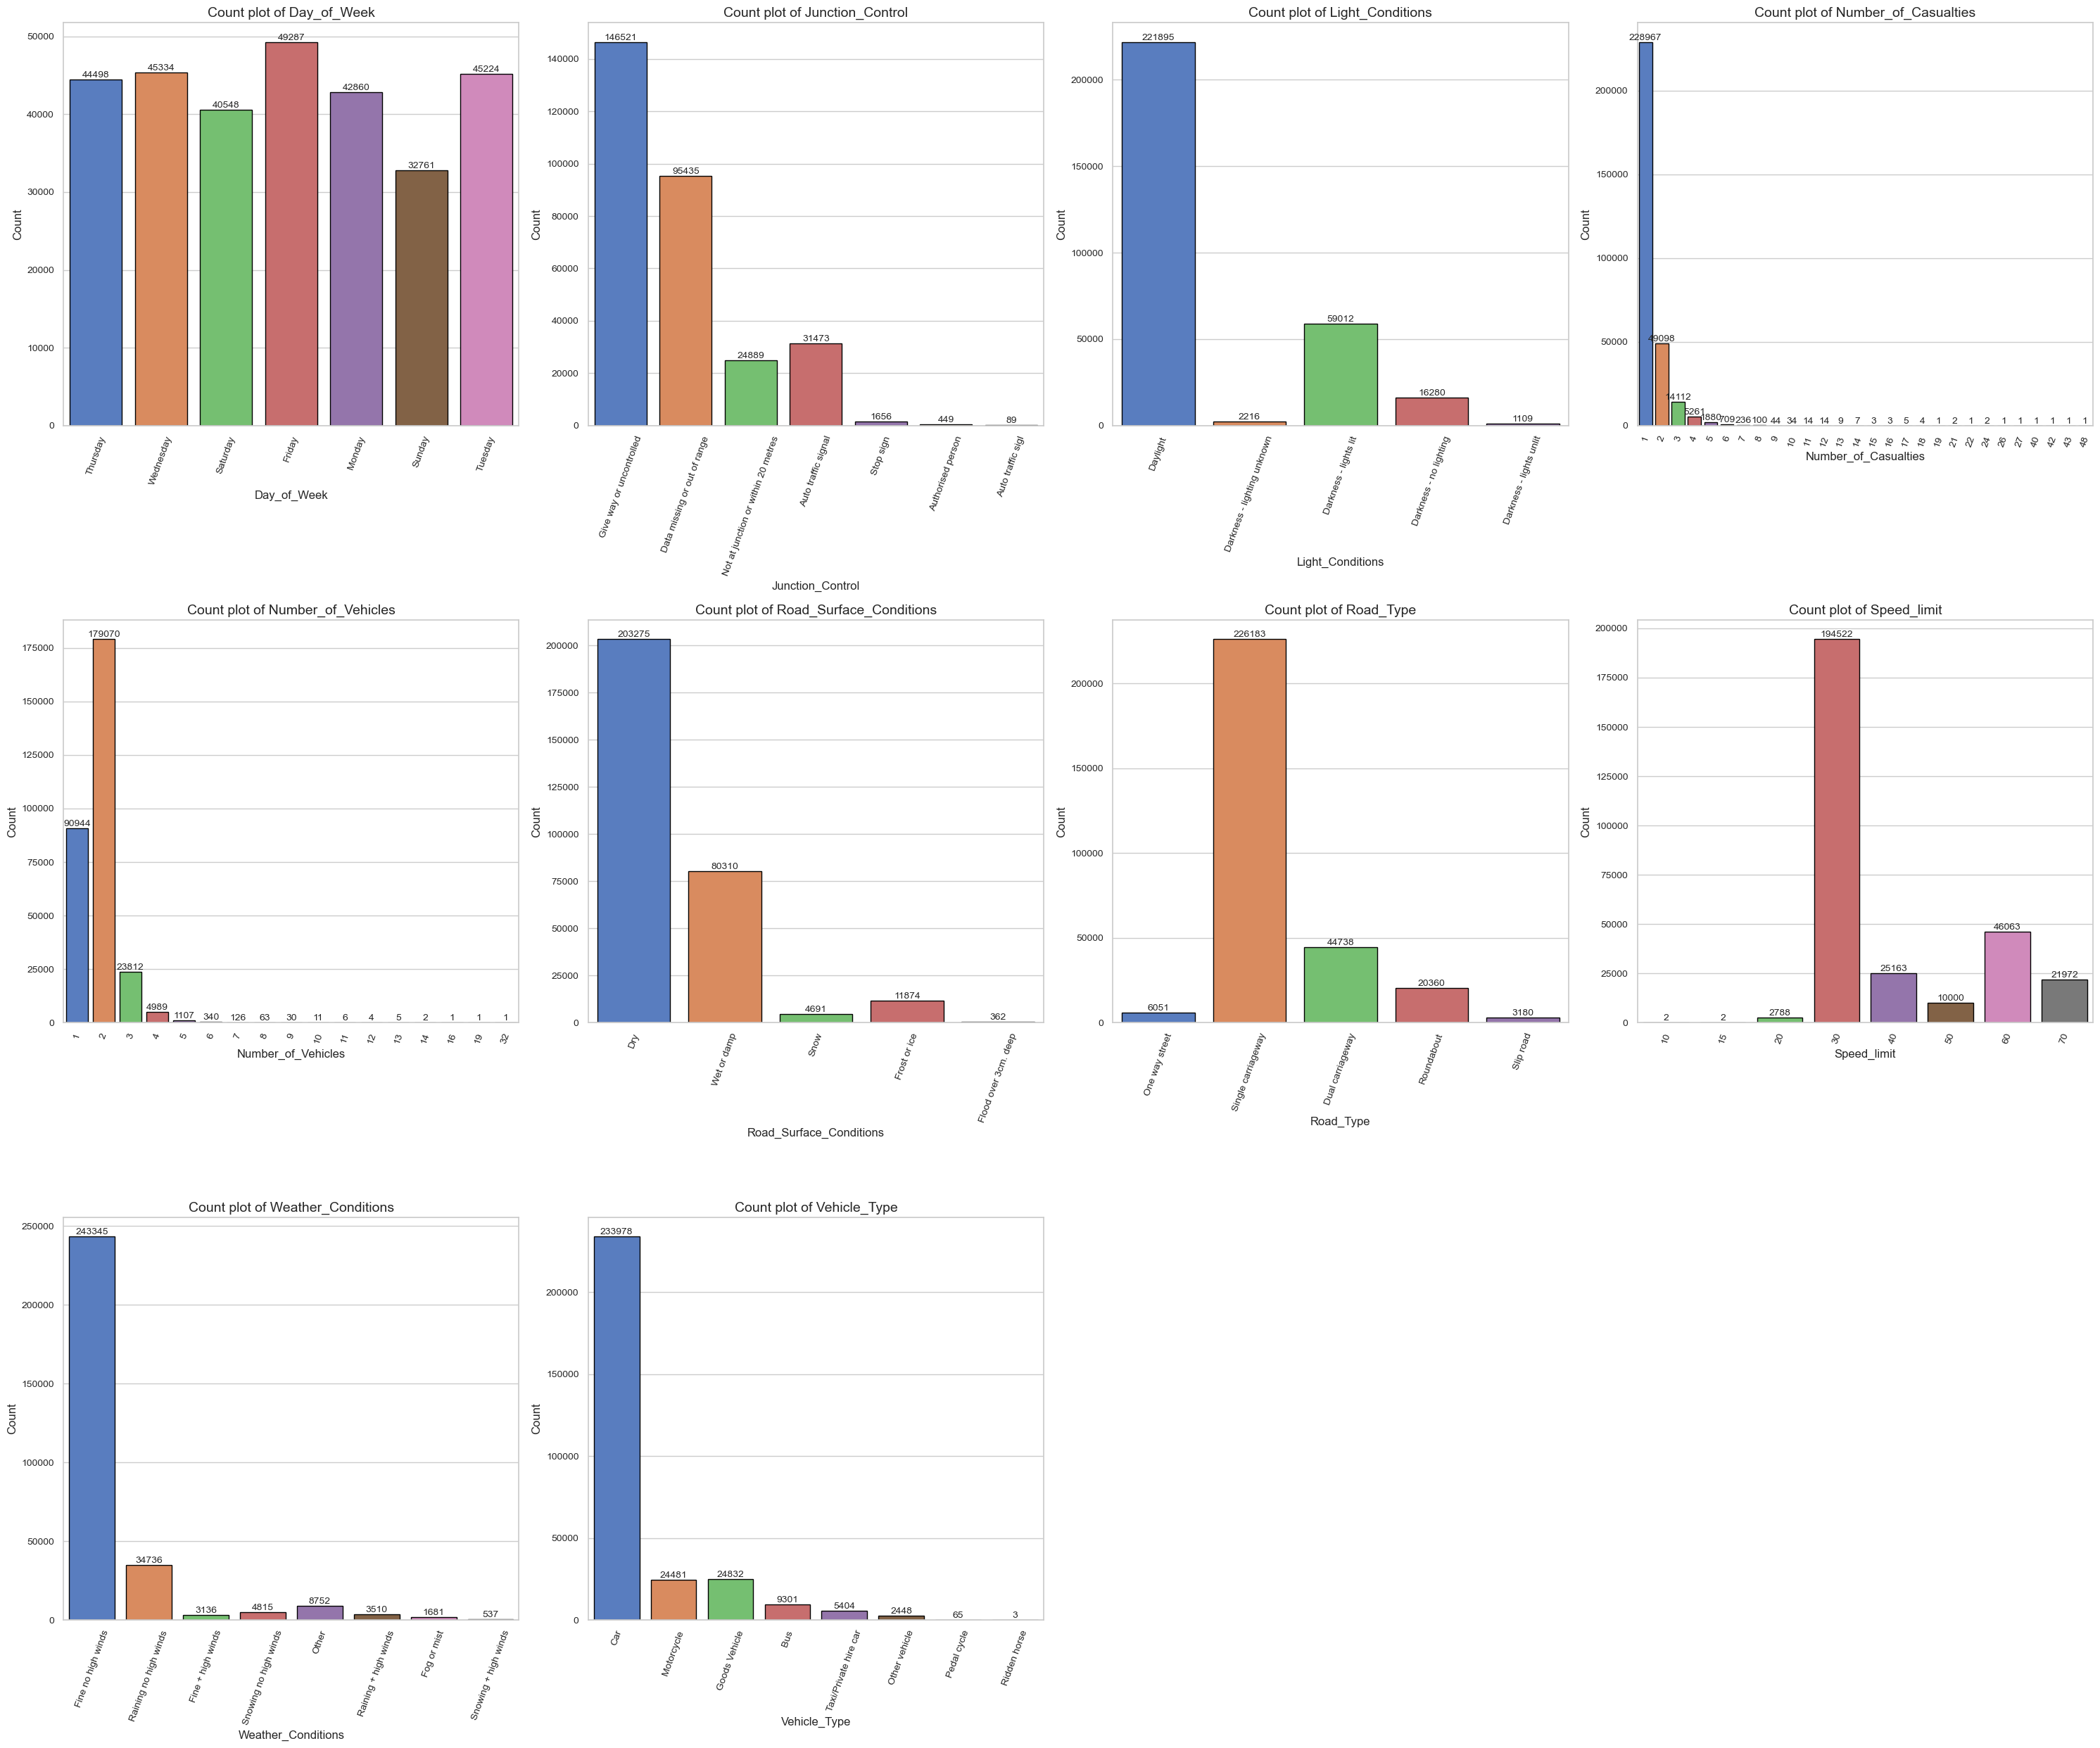

In [301]:
plt.figure(figsize = (30, 25))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x = roadAccident_df[col], palette = "muted", edgecolor='black')
    plt.title(f'Count plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=70)
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                           ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()